# Mercedes-Benz Greener Manufacturing

DESCRIPTION

Predict the time a Mercedes-Benz spends on the test bench of Daimler’s testing system.
### Problem Statement Scenario:

    Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with the crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

    To ensure the safety and reliability of every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

    You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

## Following actions should be performed:

You are required to reduce the time that cars spend on the test bench. You will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

### Step1: Import the required libraries
Step1.1: linear algebra

Step1.2: data processing

Step1.3: for dimensionality reduction

### Step2: Read the data from train.csv
Step2.1: let us understand the data

Step2.2: print few rows and see how the data looks like

### Step3: Collect the Y values into an array
Step3.1: seperate the y from the data as we will use this to learn as the prediction output

### Step4: Understand the data types we have
Step4.1:iterate through all the columns which has X in the name of the column

### Step5: Count the data in each of the columns
### Step6: Read the test.csv data
Step6.1: remove columns ID and Y from the data as they are not used for learning

### Step7: Check for null and unique values for test and train sets
### Step8: If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
Step8.1: Apply label encoder

### Step9: Make sure the data is now changed into numericals
### Step10: Perform dimensionality reduction
Step10.1: Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

### Step11: Training using xgboost
### Step12: Predict your test_df values using xgboost

# Importing required libraries such as "pandas" and "numpy"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [94]:
#loading train dataset
data_train=pd.read_csv('Mercedesbenz_train.csv')

In [95]:
data_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [96]:
data_train.shape

(4209, 378)

In [97]:
#Checking missing value
data_train.isna().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [98]:
data_train.nunique()

ID      4209
y       2545
X0        47
X1        27
X2        44
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 378, dtype: int64

In [99]:
data_train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
#Finding variance of the columns
print(data_train.var)

<bound method DataFrame.var of         ID       y  X0 X1  X2 X3 X4  X5 X6 X8  ...  X375  X376  X377  X378  \
0        0  130.81   k  v  at  a  d   u  j  o  ...     0     0     1     0   
1        6   88.53   k  t  av  e  d   y  l  o  ...     1     0     0     0   
2        7   76.26  az  w   n  c  d   x  j  x  ...     0     0     0     0   
3        9   80.62  az  t   n  f  d   x  l  e  ...     0     0     0     0   
4       13   78.02  az  v   n  f  d   h  d  n  ...     0     0     0     0   
...    ...     ...  .. ..  .. .. ..  .. .. ..  ...   ...   ...   ...   ...   
4204  8405  107.39  ak  s  as  c  d  aa  d  q  ...     1     0     0     0   
4205  8406  108.77   j  o   t  d  d  aa  h  h  ...     0     1     0     0   
4206  8412  109.22  ak  v   r  a  d  aa  g  e  ...     0     0     1     0   
4207  8415   87.48  al  r   e  f  d  aa  l  u  ...     0     0     0     0   
4208  8417  110.85   z  r  ae  c  d  aa  g  w  ...     1     0     0     0   

      X379  X380  X382  X383  X3

In [101]:
cols=[c for c in data_train.columns if 'X' in c]
print('Number of features: {}'.format(len(cols)))

Number of features: 376


In [102]:
print('Feature types:')
data_train[cols].dtypes.value_counts()

Feature types:


int64     368
object      8
dtype: int64

In [103]:
#If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
data_train.var()
#  RangeIndex: 4209
#  Columns: 378
#  dtypes: float64(1) int64(368), object(8)

ID      5.941936e+06
y       1.607667e+02
X10     1.313092e-02
X11     0.000000e+00
X12     6.945713e-02
            ...     
X380    8.014579e-03
X382    7.546747e-03
X383    1.660732e-03
X384    4.750593e-04
X385    1.423823e-03
Length: 370, dtype: float64

In [104]:
# check if there is any outlier using percentile

print(np.percentile(data_train['y'], 90))
print(np.percentile(data_train['y'], 92))
print(np.percentile(data_train['y'], 94))
print(np.percentile(data_train['y'], 96))
print(np.percentile(data_train['y'], 98))
print(np.percentile(data_train['y'], 100))

115.25
116.89160000000001
119.056
122.4
129.2992
265.32


In [105]:
print(np.percentile(data_train['y'], 99.1))
print(np.percentile(data_train['y'], 99.2))
print(np.percentile(data_train['y'], 99.3))
print(np.percentile(data_train['y'], 99.4))
print(np.percentile(data_train['y'], 99.5))
print(np.percentile(data_train['y'], 99.6))
print(np.percentile(data_train['y'], 99.7))
print(np.percentile(data_train['y'], 99.8))
print(np.percentile(data_train['y'], 99.9))

# use 155 as the treshold

139.09024
140.18360000000004
140.81639999999993
142.6480000000001
146.2304000000001
149.0374399999998
151.4276800000003
154.68695999999994
160.38328000000087


In [106]:
# find the outlier
data_train[data_train.y>=155]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
342,681,169.91,aa,l,ak,f,d,i,c,d,...,0,0,0,0,0,0,0,0,0,0
883,1770,265.32,y,r,ai,f,d,ag,l,t,...,0,0,0,0,0,0,0,0,0,0
889,1784,158.53,aj,l,as,f,d,ag,k,e,...,0,0,0,0,0,0,0,0,0,0
1203,2396,160.87,j,o,as,f,d,ab,g,p,...,1,0,0,0,0,0,0,0,0,0
1459,2903,167.45,ai,b,ae,a,d,ac,g,m,...,0,0,1,0,0,0,0,0,0,0
2735,5471,158.23,x,v,e,c,d,m,g,s,...,0,0,0,0,1,0,0,0,0,0
3133,6273,165.52,aj,v,r,c,d,q,g,a,...,0,0,1,0,0,0,0,0,0,0
3744,7500,155.62,x,f,ak,c,d,v,d,d,...,1,0,0,0,0,0,0,0,0,0


In [107]:
# remove the outlier
data_train = data_train[data_train.y<155]

In [108]:
data_train[data_train.y>=155]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


In [109]:
data_train.shape

(4201, 378)

In [110]:
#Counting the data in each of the columns
counts = [[], [], []]
for c in cols:
    typ = data_train[c].dtype
    uniq = len(np.unique(data_train[c]))
    if uniq == 1:
        counts[0].append(c)
    elif uniq == 2 and typ == np.int64:
        counts[1].append(c)
    else:
        counts[2].append(c)

print('Constant features: {} Binary features: {} Categorical features: {}\n'
      .format(*[len(c) for c in counts]))
print('Constant features:', counts[0])
print('Categorical features:', counts[2])

Constant features: 13 Binary features: 355 Categorical features: 8

Constant features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347']
Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


<AxesSubplot:xlabel='X0', ylabel='y'>

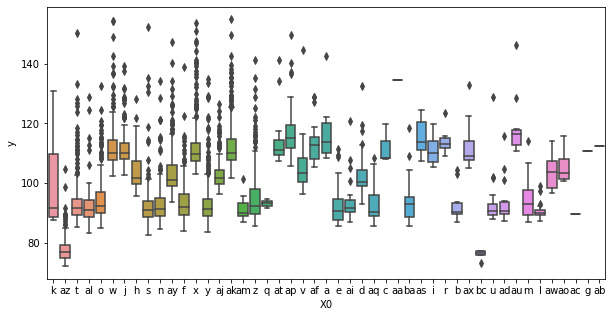

In [111]:
# check variance for categorical variables
plt.figure(figsize=(10,5))
sns.boxplot(x='X0', y='y', data=data_train)

<AxesSubplot:xlabel='X1', ylabel='y'>

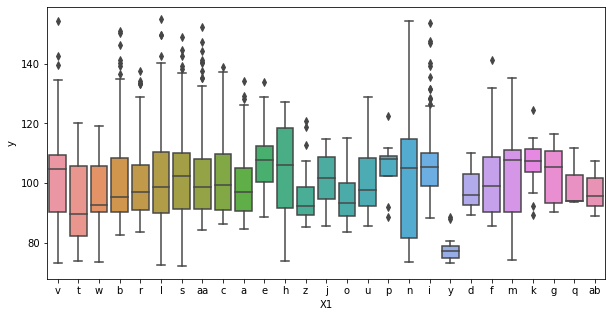

In [112]:
plt.figure(figsize=(10,5))
sns.boxplot(x='X1', y='y', data=data_train)

<AxesSubplot:xlabel='X2', ylabel='y'>

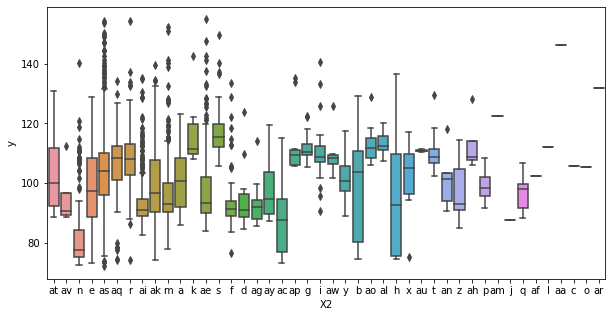

In [113]:
plt.figure(figsize=(10,5))
sns.boxplot(x='X2', y='y', data=data_train)

<AxesSubplot:xlabel='X3', ylabel='y'>

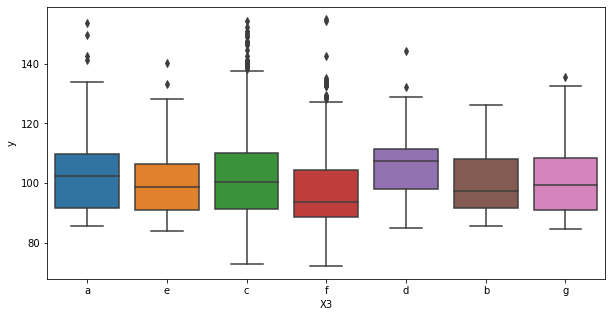

In [114]:
plt.figure(figsize=(10,5))
sns.boxplot(x='X3', y='y', data=data_train)

<AxesSubplot:xlabel='X4', ylabel='y'>

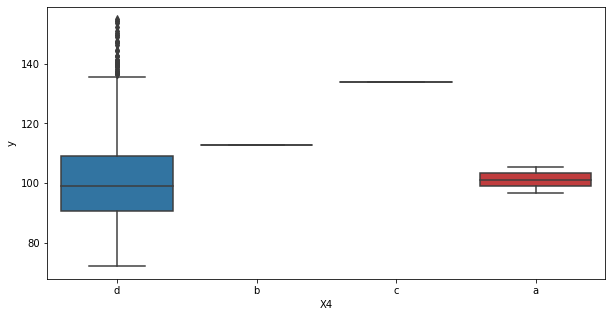

In [115]:
plt.figure(figsize=(10,5))
sns.boxplot(x='X4', y='y', data=data_train)

<AxesSubplot:xlabel='X5', ylabel='y'>

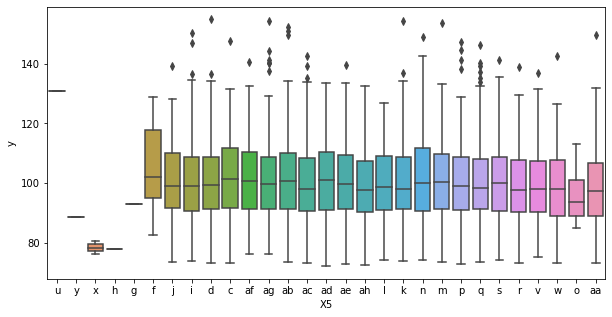

In [116]:
plt.figure(figsize=(10,5))
sns.boxplot(x='X5', y='y', data=data_train)

<AxesSubplot:xlabel='X6', ylabel='y'>

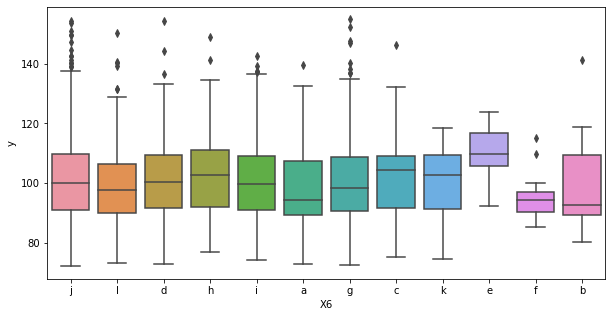

In [117]:
plt.figure(figsize=(10,5))
sns.boxplot(x='X6', y='y', data=data_train)

<AxesSubplot:xlabel='X8', ylabel='y'>

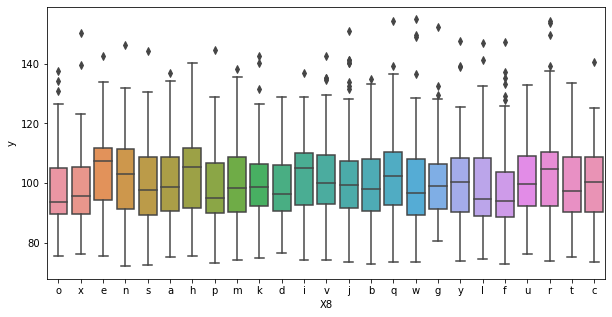

In [118]:
plt.figure(figsize=(10,5))
sns.boxplot(x='X8', y='y', data=data_train)

X4 has very little variance, hence it needs to be dropped

In [119]:
# find column with 0 variance
zero_variance = []

for column in data_train:
    if max(data_train[column])==0:
        if data_train[column].var()==0:
            print('column whose max value and variance are 0 is', column)
            zero_variance.append(column)

column whose max value and variance are 0 is X11
column whose max value and variance are 0 is X93
column whose max value and variance are 0 is X107
column whose max value and variance are 0 is X233
column whose max value and variance are 0 is X235
column whose max value and variance are 0 is X268
column whose max value and variance are 0 is X289
column whose max value and variance are 0 is X290
column whose max value and variance are 0 is X293
column whose max value and variance are 0 is X297
column whose max value and variance are 0 is X330
column whose max value and variance are 0 is X339
column whose max value and variance are 0 is X347


In [120]:
for column in data_train:
    if max(data_train[column])==1:
        if data_train[column].var()==0:
            print('column whose max value is 1 and variance 0 is', column)

# there is no column with max value 1 and variance 0

In [121]:
zero_variance = []
for feature in data_train:
    if max(data_train[feature]) == min(data_train[feature]):
        print(feature)
        zero_variance.append(feature)

X11
X93
X107
X233
X235
X268
X289
X290
X293
X297
X330
X339
X347


In [122]:
col_var = []
for column in data_train:
    if max(data_train[column])==1:
        variance = data_train[column].var()
        print('variance for column',column, 'is', variance)
        col_var.append(variance)

variance for column X10 is 0.013155597873522763
variance for column X12 is 0.06897133335600397
variance for column X13 is 0.054510490699499994
variance for column X14 is 0.24490756169164163
variance for column X15 is 0.00047596377279787255
variance for column X16 is 0.002612189841420624
variance for column X17 is 0.007561011550537089
variance for column X18 is 0.007795422858503331
variance for column X19 is 0.08962117863094428
variance for column X20 is 0.12245383752167505
variance for column X21 is 0.0026121898414206944
variance for column X22 is 0.0795507872275351
variance for column X23 is 0.02028530621960697
variance for column X24 is 0.0019011346504799248
variance for column X26 is 0.004975005950964749
variance for column X27 is 0.21684802938075823
variance for column X28 is 0.03155529862504552
variance for column X29 is 0.04123848063386199
variance for column X30 is 0.004503349542625843
variance for column X31 is 0.178137744981362
variance for column X32 is 0.011065279241903307
v

In [123]:
col_nam = []
for column in data_train:
    if max(data_train[column])==1:
        print(column)
        col_nam.append(column)

X10
X12
X13
X14
X15
X16
X17
X18
X19
X20
X21
X22
X23
X24
X26
X27
X28
X29
X30
X31
X32
X33
X34
X35
X36
X37
X38
X39
X40
X41
X42
X43
X44
X45
X46
X47
X48
X49
X50
X51
X52
X53
X54
X55
X56
X57
X58
X59
X60
X61
X62
X63
X64
X65
X66
X67
X68
X69
X70
X71
X73
X74
X75
X76
X77
X78
X79
X80
X81
X82
X83
X84
X85
X86
X87
X88
X89
X90
X91
X92
X94
X95
X96
X97
X98
X99
X100
X101
X102
X103
X104
X105
X106
X108
X109
X110
X111
X112
X113
X114
X115
X116
X117
X118
X119
X120
X122
X123
X124
X125
X126
X127
X128
X129
X130
X131
X132
X133
X134
X135
X136
X137
X138
X139
X140
X141
X142
X143
X144
X145
X146
X147
X148
X150
X151
X152
X153
X154
X155
X156
X157
X158
X159
X160
X161
X162
X163
X164
X165
X166
X167
X168
X169
X170
X171
X172
X173
X174
X175
X176
X177
X178
X179
X180
X181
X182
X183
X184
X185
X186
X187
X189
X190
X191
X192
X194
X195
X196
X197
X198
X199
X200
X201
X202
X203
X204
X205
X206
X207
X208
X209
X210
X211
X212
X213
X214
X215
X216
X217
X218
X219
X220
X221
X222
X223
X224
X225
X226
X227
X228
X229
X230
X231
X232
X234
X236
X237
X

In [124]:
col_nam = pd.DataFrame(col_nam)
col_var = pd.DataFrame(col_var)
column_variance = pd.concat([col_nam, col_var], axis=1)

col_names = ['col_id', 'col_var']
column_variance.columns = col_names
column_variance.head()

,col_id,col_var
0,X10,0.013156
1,X12,0.068971
2,X13,0.054510
3,X14,0.244908
4,X15,0.000476


In [125]:
column_variance.duplicated(subset=['col_var']).sum()

53

In [126]:
duplicated_col = column_variance.loc[column_variance['col_var'].duplicated(keep='first'),:]

In [127]:
duplicated_col = duplicated_col['col_id']
duplicated_col

23      X35
25      X37
27      X39
45      X57
63      X76
71      X84
80      X94
88     X102
98     X113
104    X119
105    X120
106    X122
114    X130
118    X134
120    X136
130    X146
131    X147
140    X157
155    X172
175    X194
180    X199
186    X205
194    X213
195    X214
197    X216
203    X222
207    X226
208    X227
213    X232
218    X239
221    X242
222    X243
223    X244
224    X245
226    X247
227    X248
232    X253
233    X254
241    X262
242    X263
245    X266
257    X279
271    X296
273    X299
276    X302
293    X320
297    X324
299    X326
330    X360
334    X364
335    X365
351    X382
354    X385
Name: col_id, dtype: object

In [128]:
# drop zero_variance and duplicated_column from training dataset
for names in zero_variance:
    data_train = data_train.drop(names, 1)

In [129]:
for names in duplicated_col:
    data_train = data_train.drop(names, 1)

In [130]:
# remove y column from train dataset
mercedes_y = data_train.y
datA_train = data_train.drop(['y', 'ID', 'X4'], 1)
print(data_train.shape)
data_train.head()

(4201, 312)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,0,0,1,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,1,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,0,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [131]:
#the prediction output
y_train = data_train['y'].values

In [132]:
#Importing testing data
data_test=pd.read_csv('Merce_Benz_Test.csv')
data_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [133]:
#removing columns ID and Y from the data
remove_columns = list(set(data_train.columns) - set(['ID', 'y']))
y_train = data_train['y'].values
id_test = data_test['ID'].values

x_train = data_train[remove_columns]
x_test = data_test[remove_columns]

In [134]:
#Check for null and unique values for tain and test dataset
def check_missing_values(df):
    if df.isnull().any().any():
        print("There are missing values in the dataframe")
    else:
        print("There are no missing values in the dataframe")

In [135]:
#checking null in train dataest
check_missing_values(x_train)

There are no missing values in the dataframe


In [136]:
#checking null in test dataset
check_missing_values(x_test)

There are no missing values in the dataframe


In [137]:
#If for any column(s), the variance is equal to zero
#Apply label encoder
for column in remove_columns:
    val = len(np.unique(x_train[column]))
    if val == 1:
        x_train.drop(column, axis=1) # Column with only one 
        # value is useless so we drop it
        x_test.drop(column, axis=1)
    if val > 2: # Column is categorical
        mapper = lambda x: sum([ord(digit) for digit in x])
        x_train[column] = x_train[column].apply(mapper)
        x_test[column] = x_test[column].apply(mapper)
x_train.head()

,X85,X337,X306,X352,X180,X2,X22,X169,X212,X280,...,X331,X142,X90,X202,X114,X110,X315,X204,X15,X89
0,1,0,1,0,0,213,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,1,1,0,0,0,215,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,110,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,110,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,110,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [138]:
print('Feature types:')
x_train[cols].dtypes.value_counts()

Feature types:


KeyError: "['X360', 'X339', 'X37', 'X248', 'X102', 'X119', 'X330', 'X39', 'X233', 'X134', 'X194', 'X320', 'X245', 'X324', 'X297', 'X253', 'X290', 'X107', 'X266', 'X385', 'X199', 'X147', 'X364', 'X84', 'X293', 'X244', 'X205', 'X243', 'X35', 'X326', 'X136', 'X11', 'X214', 'X382', 'X76', 'X146', 'X299', 'X57', 'X120', 'X122', 'X222', 'X279', 'X365', 'X254', 'X216', 'X247', 'X226', 'X232', 'X302', 'X93', 'X227', 'X130', 'X262', 'X263', 'X94', 'X242', 'X347', 'X296', 'X172', 'X213', 'X239', 'X113', 'X157', 'X289', 'X268', 'X235'] not in index"

Apply the same for data_test dataset

In [139]:
for names in zero_variance:
    data_test = data_test.drop(names, 1)

In [140]:
for names in duplicated_col:
    data_test = data_test.drop(names, 1)

In [141]:
data_test['X4'].unique()

array(['d', 'b', 'a', 'c'], dtype=object)

In [142]:
id_test = data_test.ID
data_test = data_test.drop(['ID', 'X4'], 1)
print(data_test.shape)
data_test.head()

(4209, 309)


,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,az,v,n,f,t,a,w,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,t,b,ai,a,b,g,y,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,az,v,as,f,a,j,j,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,az,l,n,f,z,l,n,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,w,s,as,c,y,i,m,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Apply label encoder for training dataset

In [143]:
# create dummy for categorical variables
dummies = []
for column in data_train:
    if max(data_train[column]) !=1:
        dummies.append(column)

print(dummies)

['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [144]:
for feature in dummies:
    unique = data_train[feature].nunique()
    print('The unique variable in', feature, 'is', unique)

The unique variable in ID is 4201
The unique variable in y is 2537
The unique variable in X0 is 47
The unique variable in X1 is 27
The unique variable in X2 is 44
The unique variable in X3 is 7
The unique variable in X4 is 4
The unique variable in X5 is 29
The unique variable in X6 is 12
The unique variable in X8 is 25


In [145]:
from sklearn.preprocessing import LabelEncoder

train_le = data_train[dummies]

for feature in dummies:
    le = LabelEncoder()
    train_le[feature] = le.fit_transform(train_le[feature].values)
    for column in train_le:
        data_train[column] = train_le[column]

print(data_train.shape)

(4201, 312)


In [146]:
data_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,0,2466,32,23,17,0,3,24,9,14,...,0,0,0,0,1,0,0,0,0,0
1,1,366,32,21,19,4,3,28,11,14,...,0,0,1,0,0,0,0,0,0,0
2,2,69,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,0,0,0,0
3,3,133,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,4,106,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


### Applying LabelEncoder for testing dataset

In [154]:
# create dummy for categorical variables
dummies = []
for column in data_test:
    if max(data_test[column]) !=1:
        dummies.append(column)

print(dummies)

['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8', 'X257', 'X258', 'X295', 'X369']


In [155]:
for feature in dummies:
    unique = data_test[feature].nunique()
    print('The unique variable in', feature, 'is', unique)

The unique variable in X0 is 49
The unique variable in X1 is 27
The unique variable in X2 is 45
The unique variable in X3 is 7
The unique variable in X5 is 32
The unique variable in X6 is 12
The unique variable in X8 is 25
The unique variable in X257 is 1
The unique variable in X258 is 1
The unique variable in X295 is 1
The unique variable in X369 is 1


In [153]:
test_le = data_test[dummies]

for feature in dummies:
    le = LabelEncoder()
    test_le[feature] = le.fit_transform(test_le[feature].values)
    for column in test_le:
        data_test[column] = test_le[column]

print(data_test.shape)

(4209, 309)


In [156]:
data_test.head()

,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,az,v,n,f,t,a,w,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,t,b,ai,a,b,g,y,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,az,v,as,f,a,j,j,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,az,l,n,f,z,l,n,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,w,s,as,c,y,i,m,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Perform dimensionality reduction

In [173]:
#Perform dimensionality reduction (PCA)

from sklearn.decomposition import PCA

pca = PCA(n_components=6, random_state=420)
pca2_results_train = pca.fit_transform(x_train)
pca2_results_test = pca.transform(x_test)

In [174]:
print (pca2_results_train.shape)
print (pca2_results_test.shape)

(4201, 6)
(4209, 6)


### Predict your training values using XGBoost

In [23]:
#Training using xgboost
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_valid, y_train, y_valid = train_test_split(
        pca2_results_train, 
        y_train, test_size=0.2, 
        random_state=4242)

In [25]:
d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(pca2_results_test)

In [26]:
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

In [27]:
clf = xgb.train(params, d_train, 
                1000, watchlist, early_stopping_rounds=50, 
                feval=xgb_r2_score, maximize=True, verbose_eval=10)

[10:52:49] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:99.14835	train-r2:-58.35295	valid-rmse:98.26297	valid-r2:-67.63754
[10]	train-rmse:81.27653	train-r2:-38.88428	valid-rmse:80.36433	valid-r2:-44.91014
[20]	train-rmse:66.71610	train-r2:-25.87403	valid-rmse:65.77334	valid-r2:-29.75260
[30]	train-rmse:54.86915	train-r2:-17.17724	valid-rmse:53.89120	valid-r2:-19.64513
[40]	train-rmse:45.24563	train-r2:-11.36018	valid-rmse:44.22231	valid-r2:-12.90160
[50]	train-rmse:37.44742	train-r2:-7.46672	valid-rmse:36.37758	valid-r2:-8.40697
[60]	train-rmse:31.15106	train-r2:-4.85891	valid-rmse:30.01765	valid-r2:-5.40524
[70]	train-rmse:26.08769	train-r2:-3.10906	valid-rmse:24.90834	valid-r2:-3.41033
[80]	train-rmse:22.04898	train-r2:-1.93527	valid-rmse:20.82490	valid-r2:-2.08282
[90]	train-rmse:18.84763	train-r2:-1.14479	valid-rmse:17.59546	valid-r2:-1.20081
[100]	train-rmse:16.33696	

### k-fold Cross Validation using XGBoost

In [182]:
params = {'objective':'reg:linear', 'colsample_bytree':0.3, 'learning_rate':0.1,
         'max_depth': 5, 'alpha': 10}

cv_result = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50,
                  early_stopping_rounds=10, metrics='rmse', as_pandas=True, seed=123)

cv_result.head()

[18:18:54] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:18:54] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:18:54] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,90.847816,0.117024,90.847605,0.273354
1,81.845123,0.061088,81.860189,0.318887
2,73.790029,0.105308,73.795685,0.353849
3,66.504288,0.140739,66.518255,0.427273
4,59.953236,0.209891,59.977852,0.503631


### test data prediction using xgboost

In [193]:
#Predicting  data_test values using xgboost
pred_test = clf.predict(d_test)


In [194]:
pred_test

array([ 83.11175 ,  97.731224,  83.46615 , ...,  99.11691 , 106.95423 ,
        96.70158 ], dtype=float32)

In [189]:
p_test = clf.predict(d_test)
final_df = pd.DataFrame()
final_df['ID'] = id_test
final_df['y'] = p_test
final_df.to_csv('xgb.csv', index=False)
final_df.head()

,ID,y
0,1,83.111748
1,2,97.731224
2,3,83.466148
3,4,76.989723
4,5,112.374481


Saved the final file as xgb.csv

## Outline steps in this project are:
Import all the required libraries (some libraries may be imported later)

Load and prepare the data for analysis. This step include:

~ Check for null and unique values for test and train sets

~ Find and remove outliers from the datasets

~ Check variance from categorical variables

~ Remove variables with very little to zero variance

~ Apply label encoder

Perform dimensionality reduction

XGBoost Analysis:

~ Predict your test values using XGBoost

~ k-fold Cross Validation using XGBoost

~ Test data prediction using XGBoost